In [16]:
# ------------------------------
# 5. Campaigns Table (Synthetic Data)
# ------------------------------
campaigns = pd.DataFrame({
    "channel": ["Email", "Social Media", "Search Ads"],
    "ROI": np.random.uniform(0.5, 2.0, size=3) # Example ROI values
})
print("\n--- Campaigns Data (first 5 rows) ---")
display(campaigns.head())


--- Campaigns Data (first 5 rows) ---


,channel,ROI
0,Email,1.114507
1,Social Media,1.482761
2,Search Ads,0.890355


In [17]:
import plotly.express as px

# ------------------------------
# 1. Revenue by User Segment
# ------------------------------
revenue_by_segment = orders_with_users.groupby('segment')['revenue'].sum().reset_index()
fig1 = px.bar(revenue_by_segment, x='segment', y='revenue', color='segment',
              title="Revenue by User Segment")
fig1.show()

# ------------------------------
# 2. Top 5 Products by Revenue
# ------------------------------
top_products = revenue_per_product.sort_values(by='revenue', ascending=False).head(5)
fig2 = px.bar(top_products, x='product_id', y='revenue', color='product_id',
              title="Top 5 Products by Revenue")
fig2.show()

# ------------------------------
# 3. Marketing Campaign ROI
# ------------------------------
fig3 = px.bar(campaigns, x='channel', y='ROI', color='channel',
              title="Marketing Campaign ROI")
fig3.show()

# ------------------------------
# 4. Session Analytics (Marketplace Activity)
# ------------------------------
fig4 = px.histogram(sessions, x='page_views', nbins=20, title="User Page Views Distribution")
fig4.show()

fig5 = px.histogram(sessions, x='duration_seconds', nbins=20, title="Session Duration Distribution")
fig5.show()

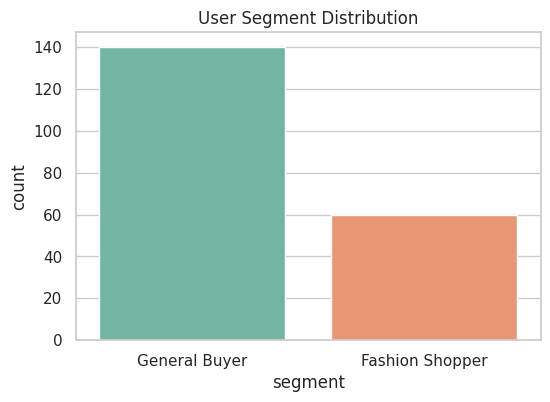

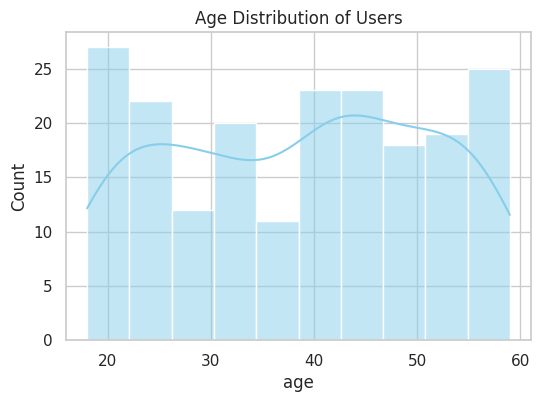

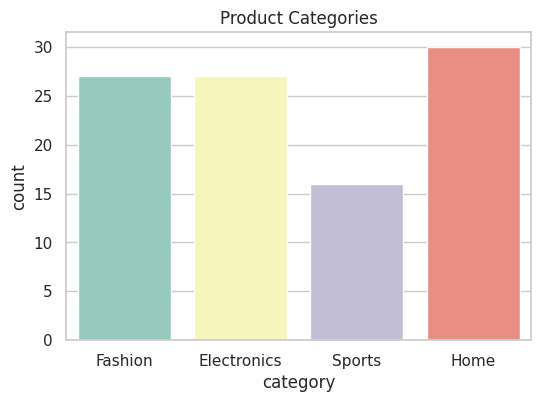

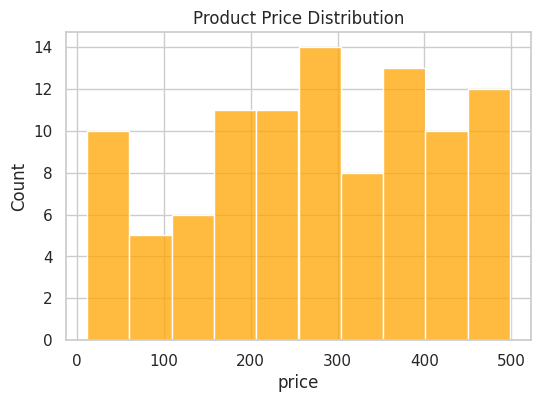

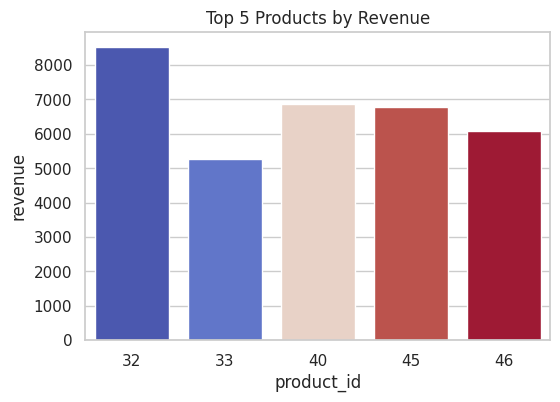

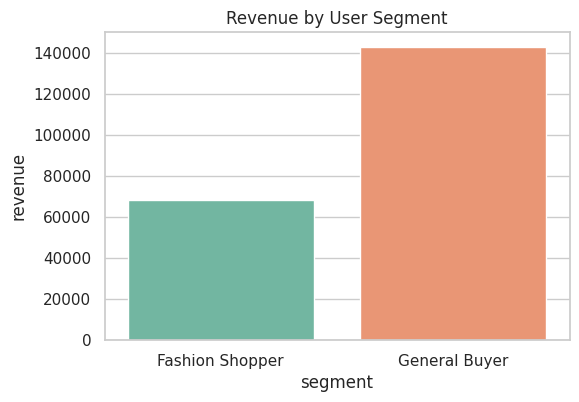

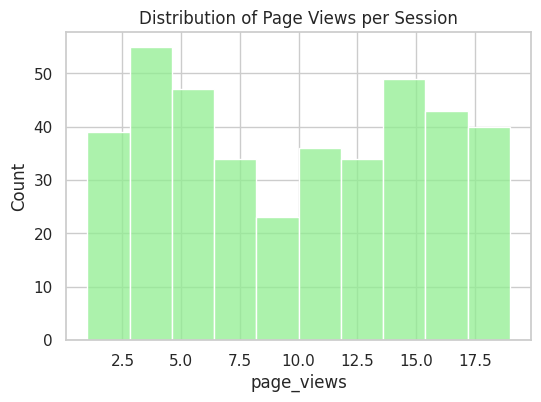

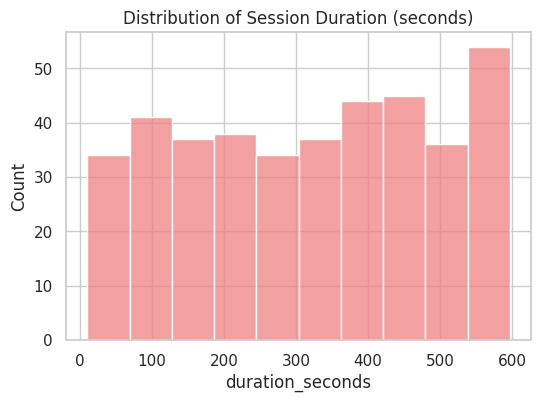

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# ------------------------------
# 1. User Insights
# ------------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=users, x='segment', palette='Set2', hue='segment', legend=False)
plt.title("User Segment Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(users['age'], bins=10, kde=True, color='skyblue')
plt.title("Age Distribution of Users")
plt.show()

# ------------------------------
# 2. Product Insights
# ------------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=products, x='category', palette='Set3', hue='category', legend=False)
plt.title("Product Categories")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(products['price'], bins=10, color='orange')
plt.title("Product Price Distribution")
plt.show()

# ------------------------------
# 3. Orders & Revenue Insights
# ------------------------------
# Total revenue per product
revenue_per_product = orders.groupby('product_id')['revenue'].sum().reset_index()
top_products = revenue_per_product.sort_values(by='revenue', ascending=False).head(5)

plt.figure(figsize=(6,4))
sns.barplot(data=top_products, x='product_id', y='revenue', palette='coolwarm', hue='product_id', legend=False)
plt.title("Top 5 Products by Revenue")
plt.show()

# Revenue per user segment
orders_with_users = orders.merge(users[['user_id','segment']], on='user_id')
revenue_by_segment = orders_with_users.groupby('segment')['revenue'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=revenue_by_segment, x='segment', y='revenue', palette='Set2', hue='segment', legend=False)
plt.title("Revenue by User Segment")
plt.show()

# ------------------------------
# 4. Marketplace Activity
# ------------------------------
plt.figure(figsize=(6,4))
sns.histplot(sessions['page_views'], bins=10, color='lightgreen')
plt.title("Distribution of Page Views per Session")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(sessions['duration_seconds'], bins=10, color='lightcoral')
plt.title("Distribution of Session Duration (seconds)")
plt.show()

In [19]:
import pandas as pd
import numpy as np

# ------------------------------
# 1. Users Table
# ------------------------------
np.random.seed(42)
user_ids = range(1, 201)  # 200 users

users = pd.DataFrame({
    "user_id": user_ids,
    "age": np.random.randint(18, 60, size=200),
    "gender": np.random.choice(["Male", "Female"], size=200),
    "location": np.random.choice(["City A", "City B", "City C"], size=200),
    "segment": np.random.choice(["General Buyer", "Fashion Shopper"], size=200, p=[0.7, 0.3])
})

# ------------------------------
# 2. Products Table
# ------------------------------
product_ids = range(1, 101)  # 100 products

products = pd.DataFrame({
    "product_id": product_ids,
    "category": np.random.choice(["Electronics", "Home", "Fashion", "Sports"], size=100),
    "price": np.round(np.random.uniform(10, 500, size=100), 2),
    "brand": np.random.choice(["Brand A", "Brand B", "Brand C"], size=100),
    "rating": np.round(np.random.uniform(1, 5, size=100), 1)
})

# ------------------------------
# 3. Orders Table
# ------------------------------
order_ids = range(1, 301)  # 300 orders

orders = pd.DataFrame({
    "order_id": order_ids,
    "user_id": np.random.choice(users["user_id"], size=300),
    "product_id": np.random.choice(products["product_id"], size=300),
    "quantity": np.random.randint(1, 5, size=300),
    "payment_method": np.random.choice(["Credit Card", "UPI", "Wallet"], size=300)
})

# Fix revenue calculation
orders["revenue"] = orders.apply(lambda row: row["quantity"] * products.loc[products["product_id"] == row["product_id"], "price"].values[0], axis=1)

# ------------------------------
# 4. Sessions Table
# ------------------------------
sessions = pd.DataFrame({
    "session_id": range(1, 401),
    "user_id": np.random.choice(users["user_id"], size=400),
    "page_views": np.random.randint(1, 20, size=400),
    "duration_seconds": np.random.randint(10, 600, size=400),
    "timestamp": pd.to_datetime('2023-01-01') + pd.to_timedelta(np.random.randint(0, 365, size=400), unit='D') + pd.to_timedelta(np.random.randint(0, 24 * 60 * 60, size=400), unit='s')
})

print("\n--- Users Data (first 5 rows) ---")
display(users.head())

print("\n--- Products Data (first 5 rows) ---")
display(products.head())

print("\n--- Orders Data (first 5 rows) ---")
display(orders.head())

print("\n--- Sessions Data (first 5 rows) ---")
display(sessions.head())


--- Users Data (first 5 rows) ---


,user_id,age,gender,location,segment
0,1,56,Male,City B,General Buyer
1,2,46,Female,City C,General Buyer
2,3,32,Female,City B,General Buyer
3,4,25,Male,City C,Fashion Shopper
4,5,38,Female,City B,General Buyer



--- Products Data (first 5 rows) ---


,product_id,category,price,brand,rating
0,1,Fashion,178.03,Brand C,4.3
1,2,Electronics,242.25,Brand C,2.3
2,3,Sports,184.00,Brand B,2.2
3,4,Home,327.92,Brand B,1.9
4,5,Electronics,245.00,Brand A,3.4



--- Orders Data (first 5 rows) ---


,order_id,user_id,product_id,quantity,payment_method,revenue
0,1,37,89,2,UPI,909.70
1,2,166,73,3,Credit Card,630.51
2,3,137,68,2,Credit Card,613.98
3,4,53,14,2,Wallet,615.40
4,5,172,98,3,Credit Card,674.94



--- Sessions Data (first 5 rows) ---


,session_id,user_id,page_views,duration_seconds,timestamp
0,1,104,4,310,2023-09-21 15:42:55
1,2,118,10,352,2023-01-12 00:47:51
2,3,5,12,440,2023-04-29 12:46:42
3,4,104,17,433,2023-10-17 13:50:12
4,5,108,14,341,2023-12-04 06:17:06
